**This notebook compares the baseline and augmented models.**

Steps:

- Both models were loaded from saved files.

- Predictions were generated on the validation dataset.

- ROC curves were plotted per emotion class.

- Accuracy scores were reported and plotted for both models.



In [24]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Path and settings
subset_dir = "/Users/lauratm/Downloads/archive/subset_224x224"
image_size = (224, 224)
batch_size = 10

# Load validation dataset
val_ds = image_dataset_from_directory(
    subset_dir,
    validation_split=0.6,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

class_names = val_ds.class_names
num_classes = len(class_names)


Found 1568 files belonging to 7 classes.
Using 940 files for validation.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step


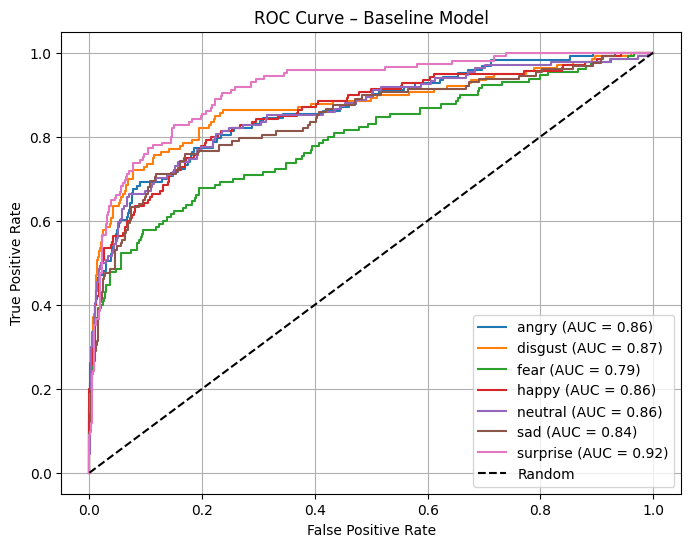

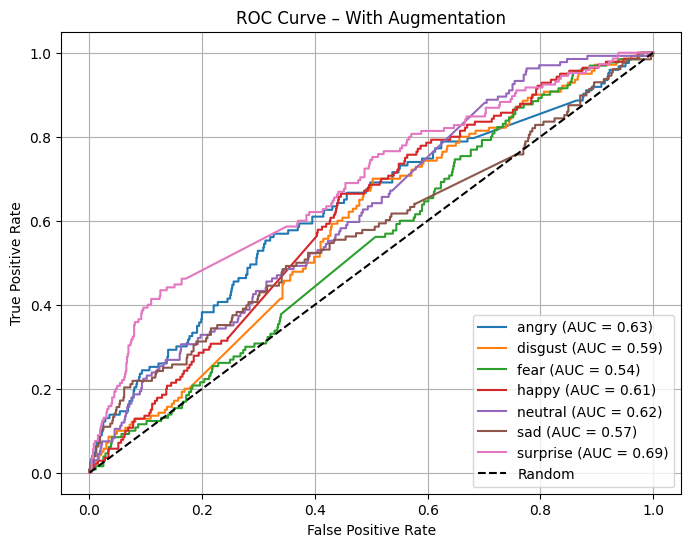

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load models
model_base = tf.keras.models.load_model("baseline_model.keras")
model_aug = tf.keras.models.load_model("baseline_model_with_augmentation.h5")

# Get class names
class_names = val_ds.class_names
num_classes = len(class_names)

# Get validation images and labels as arrays
val_images = []
val_labels = []

for images, labels in val_ds:
    val_images.append(images)
    val_labels.append(labels)

val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

# One-hot encode the labels for ROC curve
val_labels_onehot = label_binarize(val_labels, classes=range(num_classes))

# Predict probabilities
probs_base = model_base.predict(val_images)
probs_aug = model_aug.predict(val_images)

# ROC plot function
def plot_roc_curves(y_true, y_probs, model_name):
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_probs[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve – {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot ROC curves
plot_roc_curves(val_labels_onehot, probs_base, "Baseline Model")
plot_roc_curves(val_labels_onehot, probs_aug, "With Augmentation")


In [28]:
# Evaluate both models on the same validation set
loss_base, acc_base = model_base.evaluate(val_ds, verbose=0)
loss_aug, acc_aug = model_aug.evaluate(val_ds, verbose=0)

print(f"Baseline Accuracy: {acc_base:.4f}")
print(f"Augmented Accuracy: {acc_aug:.4f}")


Baseline Accuracy: 0.6904
Augmented Accuracy: 0.2298


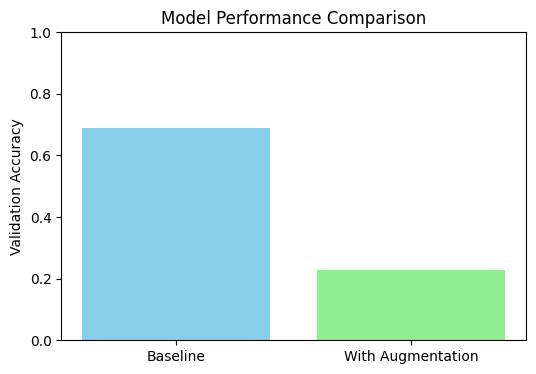

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(['Baseline', 'With Augmentation'], [acc_base, acc_aug], color=['skyblue', 'lightgreen'])
plt.ylabel('Validation Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()
